In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import pprint

import folium
from folium.plugins import MarkerCluster
import googlemaps
import geopandas as gpd

import chart_studio
chart_studio.tools.set_credentials_file(username='error-_-', api_key='TuIkGS2vNWmn3D5mwRmX')

import requests
import json
import time

import warnings
warnings.filterwarnings(action='ignore')

In [6]:
bus_time_table = pd.read_csv('./datasets/bus_time_table.csv', encoding='cp949', sep=',', parse_dates=['기준_날짜'])
bus_time_table.isna().sum()

기준_날짜            0
행정동_ID           0
버스_승객_수        424
버스_승객_수_00시    424
버스_승객_수_01시    424
버스_승객_수_02시    424
버스_승객_수_03시    424
버스_승객_수_04시    424
버스_승객_수_05시    424
버스_승객_수_06시    424
버스_승객_수_07시    424
버스_승객_수_08시    424
버스_승객_수_09시    424
버스_승객_수_10시    424
버스_승객_수_11시    424
버스_승객_수_12시    424
버스_승객_수_13시    424
버스_승객_수_14시    424
버스_승객_수_15시    424
버스_승객_수_16시    424
버스_승객_수_17시    424
버스_승객_수_18시    424
버스_승객_수_19시    424
버스_승객_수_20시    424
버스_승객_수_21시    424
버스_승객_수_22시    424
버스_승객_수_23시    424
dtype: int64

In [7]:
# 결측치 2022-12-18 삭제
del_idx = bus_time_table[bus_time_table.isna().values == True].index
bus_time_table = bus_time_table.drop(del_idx, axis=0)
bus_time_table.isna().sum()[bus_time_table.isna().sum()>0]

Series([], dtype: int64)

In [8]:
bus_time_table.shape

(173416, 27)

In [9]:
# 승객수 시간별 총합이 버스 승객수가 맞는지 확인
bus_time_table[bus_time_table[['버스_승객_수_00시', '버스_승객_수_01시',
       '버스_승객_수_02시', '버스_승객_수_03시', '버스_승객_수_04시', '버스_승객_수_05시',
       '버스_승객_수_06시', '버스_승객_수_07시', '버스_승객_수_08시', '버스_승객_수_09시',
       '버스_승객_수_10시', '버스_승객_수_11시', '버스_승객_수_12시', '버스_승객_수_13시',
       '버스_승객_수_14시', '버스_승객_수_15시', '버스_승객_수_16시', '버스_승객_수_17시',
       '버스_승객_수_18시', '버스_승객_수_19시', '버스_승객_수_20시', '버스_승객_수_21시',
       '버스_승객_수_22시', '버스_승객_수_23시']].sum(axis=1) != bus_time_table['버스_승객_수']]

,기준_날짜,행정동_ID,버스_승객_수,버스_승객_수_00시,버스_승객_수_01시,버스_승객_수_02시,버스_승객_수_03시,버스_승객_수_04시,버스_승객_수_05시,버스_승객_수_06시,...,버스_승객_수_14시,버스_승객_수_15시,버스_승객_수_16시,버스_승객_수_17시,버스_승객_수_18시,버스_승객_수_19시,버스_승객_수_20시,버스_승객_수_21시,버스_승객_수_22시,버스_승객_수_23시


#######################

In [10]:
# 컬럼명 변경
bus = pd.DataFrame()
bus['busdate'] = bus_time_table['기준_날짜']
bus['yy'] = bus_time_table['기준_날짜'].dt.year
bus['mm'] = bus_time_table['기준_날짜'].dt.month
bus['dd'] = bus_time_table['기준_날짜'].dt.day
bus['dong_id'] = bus_time_table['행정동_ID']
bus['guest_cnt'] = bus_time_table['버스_승객_수']
bus[['hh00', 'hh01',
       'hh02', 'hh03', 'hh04', 'hh05',
       'hh06', 'hh07', 'hh08', 'hh09',
       'hh10', 'hh11', 'hh12', 'hh13',
       'hh14', 'hh15', 'hh16', 'hh17',
       'hh18', 'hh19', 'hh20', 'hh21',
       'hh22', 'hh23']] = bus_time_table[['버스_승객_수_00시', '버스_승객_수_01시',
       '버스_승객_수_02시', '버스_승객_수_03시', '버스_승객_수_04시', '버스_승객_수_05시',
       '버스_승객_수_06시', '버스_승객_수_07시', '버스_승객_수_08시', '버스_승객_수_09시',
       '버스_승객_수_10시', '버스_승객_수_11시', '버스_승객_수_12시', '버스_승객_수_13시',
       '버스_승객_수_14시', '버스_승객_수_15시', '버스_승객_수_16시', '버스_승객_수_17시',
       '버스_승객_수_18시', '버스_승객_수_19시', '버스_승객_수_20시', '버스_승객_수_21시',
       '버스_승객_수_22시', '버스_승객_수_23시']].astype('int')

bus = bus.sort_values(['busdate','yy','mm','dd'])
bus

,busdate,yy,mm,dd,dong_id,guest_cnt,hh00,hh01,hh02,hh03,...,hh14,hh15,hh16,hh17,hh18,hh19,hh20,hh21,hh22,hh23
173416,2022-01-01,2022,1,1,1124082,4441.0,10,18,7,3,...,335,362,371,321,210,193,179,272,181,33
173417,2022-01-01,2022,1,1,1124081,4707.0,17,33,21,1,...,315,389,373,367,353,263,257,328,205,42
173418,2022-01-01,2022,1,1,1106091,3076.0,3,0,0,0,...,231,266,241,220,142,141,139,176,89,42
173419,2022-01-01,2022,1,1,1111079,4418.0,32,13,7,10,...,292,300,321,322,317,222,252,364,238,80
173420,2022-01-01,2022,1,1,1121069,11695.0,48,6,7,7,...,701,715,844,892,848,811,887,1445,789,336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,2023-02-15,2023,2,15,1110061,5170.0,13,0,0,0,...,267,227,261,308,333,227,149,129,76,56
420,2023-02-15,2023,2,15,1110060,7534.0,21,4,1,1,...,362,321,326,417,503,334,191,202,150,72
421,2023-02-15,2023,2,15,1110056,4684.0,18,0,2,0,...,272,271,248,221,280,193,117,96,66,34
422,2023-02-15,2023,2,15,1115069,6300.0,18,0,0,0,...,501,409,355,425,569,310,319,324,322,116


컬럼명      wd
공휴일+주말  1 
평일        0

In [68]:
공휴일22_23 = ['2022-01-01', '2022-01-31', '2022-02-01', '2022-02-02', '2022-03-01', '2022-03-09', '2022-05-05', '2022-05-08', '2022-06-01', '2022-06-06', '2022-08-15', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-10-03', '2022-10-09', '2022-10-10', '2022-12-25', '2023-01-01', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24']
bus['busdate'].isin(공휴일22_23)

173416     True
173417     True
173418     True
173419     True
173420     True
          ...  
419       False
420       False
421       False
422       False
423       False
Name: busdate, Length: 173416, dtype: bool

In [12]:
# bus = pd.read_csv('./datasets/bus_mycol.csv', parse_dates=['busdate'])
h_arr =  bus[['hh00', 'hh01', 'hh02', 'hh03', 'hh04', 'hh05', 'hh06', 'hh07', 'hh08', 'hh09', 'hh10', 'hh11', 'hh12', 'hh13', 'hh14', 'hh15', 'hh16', 'hh17', 'hh18', 'hh19', 'hh20', 'hh21', 'hh22', 'hh23']].values.reshape(-1, order='F')
hh = np.array([[i]*bus.shape[0] for i in range(24)]).reshape(-1)
b = bus[['busdate','yy','mm','dd','dong_id','guest_cnt']]
b3 = pd.concat([pd.concat([b,b]),b])
b6 = pd.concat([b3,b3])
b12 = pd.concat([b6,b6])
b24 = pd.concat([b12,b12])
b24['ww'] = b24['busdate'].dt.dayofweek
b24['hh'] = hh
b24['g_cnt'] = h_arr
b24['guest_cnt'] = b24['guest_cnt'].astype('int')
wd22_23 = ['2022-01-01', '2022-01-31', '2022-02-01', '2022-02-02', '2022-03-01', '2022-03-09', '2022-05-05', '2022-05-08', '2022-06-01', '2022-06-06', '2022-08-15', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-10-03', '2022-10-09', '2022-10-10', '2022-12-25', '2023-01-01', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24']
b24['wd'] = np.where((b24['busdate'].isin(wd22_23))|(b24['ww']==5)|(b24['ww']==6),1,0)
b24.sort_values(['busdate', 'yy', 'mm', 'dd', 'dong_id'])
b24.shape

(4161984, 10)

In [13]:
b24.set_index(['yy','mm','dd','hh'])

busdate  dong_id  guest_cnt  ww  g_cnt  wd
yy   mm dd hh                                              
2022 1  1  0  2022-01-01  1124082       4441   5     10   1
           0  2022-01-01  1124081       4707   5     17   1
           0  2022-01-01  1106091       3076   5      3   1
           0  2022-01-01  1111079       4418   5     32   1
           0  2022-01-01  1121069      11695   5     48   1
...                  ...      ...        ...  ..    ...  ..
2023 2  15 23 2023-02-15  1110061       5170   2     56   0
           23 2023-02-15  1110060       7534   2     72   0
           23 2023-02-15  1110056       4684   2     34   0
           23 2023-02-15  1115069       6300   2    116   0
           23 2023-02-15  1115065       3592   2     46   0

[4161984 rows x 6 columns]

In [14]:
b24[b24['busdate']=='2022-01-01']['dong_id'].unique()

array([1124082, 1124081, 1106091, 1111079, 1121069, 1114076, 1113071,
       1104067, 1124065, 1121079, 1119054, 1115066, 1123053, 1122057,
       1121073, 1121054, 1120054, 1119062, 1118052, 1117055, 1116063,
       1110065, 1120052, 1115058, 1110055, 1109063, 1108071, 1107071,
       1107054, 1105067, 1104073, 1104059, 1101056, 1113076, 1113062,
       1112072, 1111059, 1103058, 1125074, 1125055, 1124064, 1123080,
       1101068, 1120071, 1119075, 1119063, 1118057, 1117065, 1116069,
       1116051, 1110057, 1102052, 1115062, 1114074, 1109072, 1108083,
       1108063, 1107065, 1106087, 1106073, 1105057, 1101061, 1114066,
       1114060, 1113066, 1112065, 1111077, 1103072, 1103052, 1125070,
       1125053, 1124053, 1101071, 1123071, 1125071, 1125065, 1125056,
       1125051, 1124077, 1124069, 1124063, 1124059, 1124055, 1124051,
       1123065, 1123051, 1123076, 1123068, 1122067, 1122063, 1122059,
       1122054, 1121083, 1121071, 1121065, 1121061, 1120073, 1120069,
       1120065, 1120

In [123]:
b24['guest_cnt'].values.reshape(-1,424)

array([[ 1353, 16257,  3696, ...,  2029,  1286,  2223],
       [ 6590,  4030, 23033, ...,  1684,  2104,  2098],
       [15345,  6832, 20714, ...,  4127,  3001,  4983],
       ...,
       [33435,  7142, 22125, ...,  4173,  1974,  6474],
       [10700, 13715, 13550, ...,  4307,  2030,  7041],
       [ 4653, 10205, 14359, ..., 10620,  8227, 15015]])

In [100]:
b24.pivot(index=['yy', 'mm', 'dd', 'hh'], columns='dong_id', values = 'guest_cnt')

dong_id        1101053  1101054  1101055  1101056  1101057  1101058  1101060  \
yy   mm dd hh                                                                  
2022 1  1  0      9204     1748     3508     4202      926     3960      709   
           1      9204     1748     3508     4202      926     3960      709   
           2      9204     1748     3508     4202      926     3960      709   
           3      9204     1748     3508     4202      926     3960      709   
           4      9204     1748     3508     4202      926     3960      709   
...                ...      ...      ...      ...      ...      ...      ...   
2023 2  15 19    28956     4521     8227     8780     2012    10620     2033   
           20    28956     4521     8227     8780     2012    10620     2033   
           21    28956     4521     8227     8780     2012    10620     2033   
           22    28956     4521     8227     8780     2012    10620     2033   
           23    28956     4521     8227     8780     2012    10620     2033   

dong_id        1101061  1101063  1101064  ...  1125061  1125063  1125065  \
yy   mm dd hh                             ...                              
2022 1  1  0     24600     3968     5063  ...     1839     2585     1966   
           1     24600     3968     5063  ...     1839     2585     1966   
           2     24600     3968     5063  ...     1839     2585     1966   
           3     24600     3968     5063  ...     1839     2585     1966   
           4     24600     3968     5063  ...     1839     2585     1966   
...                ...      ...      ...  ...      ...      ...      ...   
2023 2  15 19    67196    13173    15698  ...     3724     4658     5947   
           20    67196    13173    15698  ...     3724     4658     5947   
           21    67196    13173    15698  ...     3724     4658     5947   
           22    67196    13173    15698  ...     3724     4658     5947   
           23    67196    13173    15698  ...     3724     4658     5947   

dong_id        1125066  1125067  1125070  1125071  1125072  1125073  1125074  
yy   mm dd hh                                                                 
2022 1  1  0      3211     2017      657     2252     1513     5373     4381  
           1      3211     2017      657     2252     1513     5373     4381  
           2      3211     2017      657     2252     1513     5373     4381  
           3      3211     2017      657     2252     1513     5373     4381  
           4      3211     2017      657     2252     1513     5373     4381  
...                ...      ...      ...      ...      ...      ...      ...  
2023 2  15 19     6574     5003     1720     7638     3068    11116    10276  
           20     6574     5003     1720     7638     3068    11116    10276  
           21     6574     5003     1720     7638     3068    11116    10276  
           22     6574     5003     1720     7638     3068    11116    10276  
           23     6574     5003     1720     7638     3068    11116    10276  

[9816 rows x 424 columns]

In [98]:
pd.pivot_table(b24, index=['yy', 'mm', 'dd', 'hh'], columns='dong_id', values = 'guest_cnt')

dong_id        1101053  1101054  1101055  1101056  1101057  1101058  1101060  \
yy   mm dd hh                                                                  
2022 1  1  0      9204     1748     3508     4202      926     3960      709   
           1      9204     1748     3508     4202      926     3960      709   
           2      9204     1748     3508     4202      926     3960      709   
           3      9204     1748     3508     4202      926     3960      709   
           4      9204     1748     3508     4202      926     3960      709   
...                ...      ...      ...      ...      ...      ...      ...   
2023 2  15 19    28956     4521     8227     8780     2012    10620     2033   
           20    28956     4521     8227     8780     2012    10620     2033   
           21    28956     4521     8227     8780     2012    10620     2033   
           22    28956     4521     8227     8780     2012    10620     2033   
           23    28956     4521     8227     8780     2012    10620     2033   

dong_id        1101061  1101063  1101064  ...  1125061  1125063  1125065  \
yy   mm dd hh                             ...                              
2022 1  1  0     24600     3968     5063  ...     1839     2585     1966   
           1     24600     3968     5063  ...     1839     2585     1966   
           2     24600     3968     5063  ...     1839     2585     1966   
           3     24600     3968     5063  ...     1839     2585     1966   
           4     24600     3968     5063  ...     1839     2585     1966   
...                ...      ...      ...  ...      ...      ...      ...   
2023 2  15 19    67196    13173    15698  ...     3724     4658     5947   
           20    67196    13173    15698  ...     3724     4658     5947   
           21    67196    13173    15698  ...     3724     4658     5947   
           22    67196    13173    15698  ...     3724     4658     5947   
           23    67196    13173    15698  ...     3724     4658     5947   

dong_id        1125066  1125067  1125070  1125071  1125072  1125073  1125074  
yy   mm dd hh                                                                 
2022 1  1  0      3211     2017      657     2252     1513     5373     4381  
           1      3211     2017      657     2252     1513     5373     4381  
           2      3211     2017      657     2252     1513     5373     4381  
           3      3211     2017      657     2252     1513     5373     4381  
           4      3211     2017      657     2252     1513     5373     4381  
...                ...      ...      ...      ...      ...      ...      ...  
2023 2  15 19     6574     5003     1720     7638     3068    11116    10276  
           20     6574     5003     1720     7638     3068    11116    10276  
           21     6574     5003     1720     7638     3068    11116    10276  
           22     6574     5003     1720     7638     3068    11116    10276  
           23     6574     5003     1720     7638     3068    11116    10276  

[9816 rows x 424 columns]

In [84]:
b24[(b24['dong_id']==1115065)]

,busdate,yy,mm,dd,dong_id,guest_cnt,ww,hh,g_cnt,wd
0,2022-01-01,2022,1,1,1115065,1353,5,0,5,1
648,2022-01-02,2022,1,2,1115065,1494,6,0,2,1
1243,2022-01-03,2022,1,3,1115065,3139,0,0,4,0
1559,2022-01-04,2022,1,4,1115065,3247,1,0,6,0
1959,2022-01-05,2022,1,5,1115065,3247,2,0,6,0
...,...,...,...,...,...,...,...,...,...,...
171507,2023-02-11,2023,2,11,1115065,2516,5,23,29,1
172008,2023-02-12,2023,2,12,1115065,1778,6,23,18,1
172406,2023-02-13,2023,2,13,1115065,3359,0,23,39,0
172856,2023-02-14,2023,2,14,1115065,3522,1,23,44,0


In [74]:
b24.columns

Index(['busdate', 'yy', 'mm', 'dd', 'dong_id', 'guest_cnt', 'ww', 'hh',
       'g_cnt', 'wd'],
      dtype='object')

In [185]:
bus[bus['dong_id']==1101053]

,busdate,yy,mm,dd,dong_id,guest_cnt,ww,hh,g_cnt,wd
373,2022-01-01,2022,1,1,1101053,9204,5,0,32,1
784,2022-01-02,2022,1,2,1101053,10137,6,0,38,1
1221,2022-01-03,2022,1,3,1101053,22099,0,0,83,0
1669,2022-01-04,2022,1,4,1101053,23359,1,0,80,0
2069,2022-01-05,2022,1,5,1101053,23359,2,0,80,0
...,...,...,...,...,...,...,...,...,...,...
4160238,2023-02-11,2023,2,11,1101053,18636,5,23,500,1
4160684,2023-02-12,2023,2,12,1101053,15129,6,23,260,1
4161085,2023-02-13,2023,2,13,1101053,26525,0,23,518,0
4161509,2023-02-14,2023,2,14,1101053,28239,1,23,615,0


In [221]:
bus_junggu = bus[(bus['dong_id']//100==11020)]
bus_junggu

,busdate,yy,mm,dd,dong_id,guest_cnt,ww,hh,g_cnt,wd
22,2022-01-01,2022,1,1,1102073,534,5,0,4,1
50,2022-01-01,2022,1,1,1102068,1613,5,0,3,1
52,2022-01-01,2022,1,1,1102059,5557,5,0,35,1
103,2022-01-01,2022,1,1,1102054,12329,5,0,138,1
158,2022-01-01,2022,1,1,1102052,10768,5,0,56,1
...,...,...,...,...,...,...,...,...,...,...
4161812,2023-02-15,2023,2,15,1102070,3981,2,23,61,0
4161813,2023-02-15,2023,2,15,1102069,4527,2,23,98,0
4161814,2023-02-15,2023,2,15,1102067,3809,2,23,62,0
4161815,2023-02-15,2023,2,15,1102065,6033,2,23,197,0


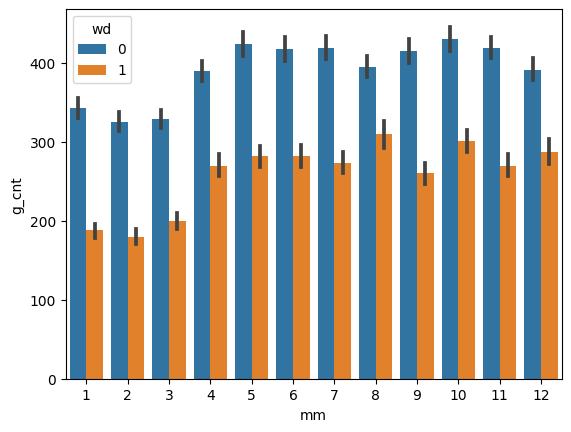

In [222]:
sns.barplot(data=bus_junggu[bus_junggu['yy']==2022], x='mm', y='g_cnt', hue='wd')
plt.show()

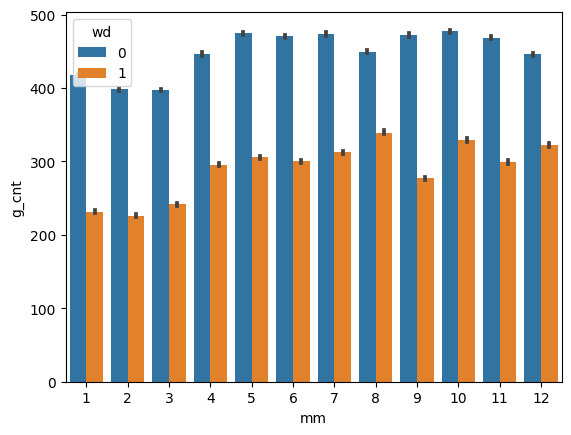

In [217]:
sns.barplot(data=bus[bus['yy']==2022], x='mm', y='g_cnt', hue='wd')
plt.show()

In [15]:
# 중구 22년 3월만
bus_junggu_3month = bus[(bus['dong_id']//100==11020)&(bus['mm']==3)].sort_values(['busdate'])
bus_junggu_3month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 148875 to 136514
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   busdate    465 non-null    datetime64[ns]
 1   yy         465 non-null    int64         
 2   mm         465 non-null    int64         
 3   dd         465 non-null    int64         
 4   dong_id    465 non-null    int64         
 5   guest_cnt  465 non-null    float64       
 6   hh00       465 non-null    int32         
 7   hh01       465 non-null    int32         
 8   hh02       465 non-null    int32         
 9   hh03       465 non-null    int32         
 10  hh04       465 non-null    int32         
 11  hh05       465 non-null    int32         
 12  hh06       465 non-null    int32         
 13  hh07       465 non-null    int32         
 14  hh08       465 non-null    int32         
 15  hh09       465 non-null    int32         
 16  hh10       465 non-null    int32    

In [194]:
# 노원구 22년 3월만
bus_nowon_3month = bus[(bus['dong_id']//100==11110)&(bus['mm']==3)].sort_values(['busdate'])
bus_nowon_3month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14136 entries, 24636 to 4026222
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   busdate    14136 non-null  datetime64[ns]
 1   yy         14136 non-null  int64         
 2   mm         14136 non-null  int64         
 3   dd         14136 non-null  int64         
 4   dong_id    14136 non-null  int64         
 5   guest_cnt  14136 non-null  int64         
 6   ww         14136 non-null  int64         
 7   hh         14136 non-null  int64         
 8   g_cnt      14136 non-null  int64         
 9   wd         14136 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 1.2 MB


In [205]:
# 강남구 22년 3월만
bus_gangnam_3month = bus[(bus['dong_id']//100==11230)&(bus['mm']==3)].sort_values(['busdate'])
bus_gangnam_3month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16368 entries, 24659 to 4026274
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   busdate    16368 non-null  datetime64[ns]
 1   yy         16368 non-null  int64         
 2   mm         16368 non-null  int64         
 3   dd         16368 non-null  int64         
 4   dong_id    16368 non-null  int64         
 5   guest_cnt  16368 non-null  int64         
 6   ww         16368 non-null  int64         
 7   hh         16368 non-null  int64         
 8   g_cnt      16368 non-null  int64         
 9   wd         16368 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 1.4 MB


In [204]:
# 송파구 22년 3월만
bus_songpa_3month = bus[(bus['dong_id']//100==11240)&(bus['mm']==3)].sort_values(['busdate'])
bus_songpa_3month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20088 entries, 24696 to 4026298
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   busdate    20088 non-null  datetime64[ns]
 1   yy         20088 non-null  int64         
 2   mm         20088 non-null  int64         
 3   dd         20088 non-null  int64         
 4   dong_id    20088 non-null  int64         
 5   guest_cnt  20088 non-null  int64         
 6   ww         20088 non-null  int64         
 7   hh         20088 non-null  int64         
 8   g_cnt      20088 non-null  int64         
 9   wd         20088 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 1.7 MB


In [203]:
# 서초구 22년 3월만
bus_seocho_3month = bus[(bus['dong_id']//100==11220)&(bus['mm']==3)].sort_values(['busdate'])
bus_seocho_3month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13392 entries, 24660 to 4026145
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   busdate    13392 non-null  datetime64[ns]
 1   yy         13392 non-null  int64         
 2   mm         13392 non-null  int64         
 3   dd         13392 non-null  int64         
 4   dong_id    13392 non-null  int64         
 5   guest_cnt  13392 non-null  int64         
 6   ww         13392 non-null  int64         
 7   hh         13392 non-null  int64         
 8   g_cnt      13392 non-null  int64         
 9   wd         13392 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 1.1 MB


In [209]:
# 종로구 22년 3월만
bus_jongro_3month = bus[(bus['dong_id']//100==11010)&(bus['mm']==3)].sort_values(['busdate'])
bus_jongro_3month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12648 entries, 24644 to 4026269
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   busdate    12648 non-null  datetime64[ns]
 1   yy         12648 non-null  int64         
 2   mm         12648 non-null  int64         
 3   dd         12648 non-null  int64         
 4   dong_id    12648 non-null  int64         
 5   guest_cnt  12648 non-null  int64         
 6   ww         12648 non-null  int64         
 7   hh         12648 non-null  int64         
 8   g_cnt      12648 non-null  int64         
 9   wd         12648 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 1.1 MB


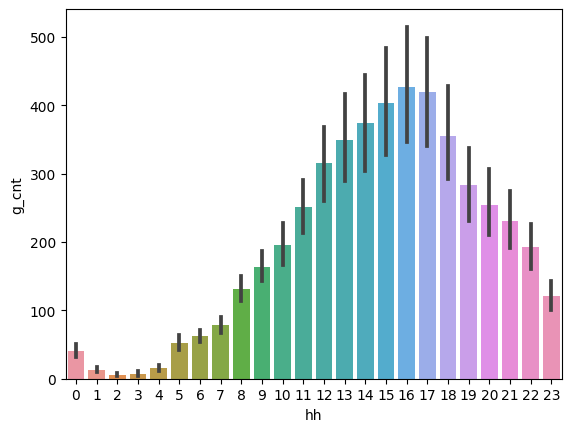

In [214]:
주말 = bus_junggu_3month[(bus_junggu_3month['ww']==5)|(bus_junggu_3month['ww']==6)|(bus_junggu_3month['dd']==1)]
sns.barplot(data=주말, x='hh', y='g_cnt')
plt.show()

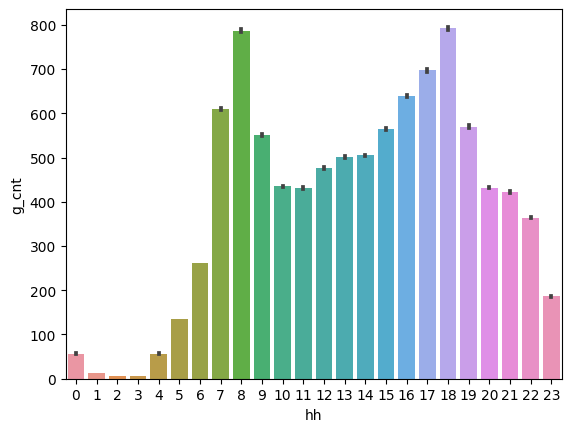

In [215]:
주중 = bus_junggu_3month[(bus_junggu_3month['ww']!=5)&(bus_junggu_3month['ww']!=6)&(bus_junggu_3month['dd']!=1)]
sns.barplot(data=bus, x='hh', y='g_cnt')
plt.show()

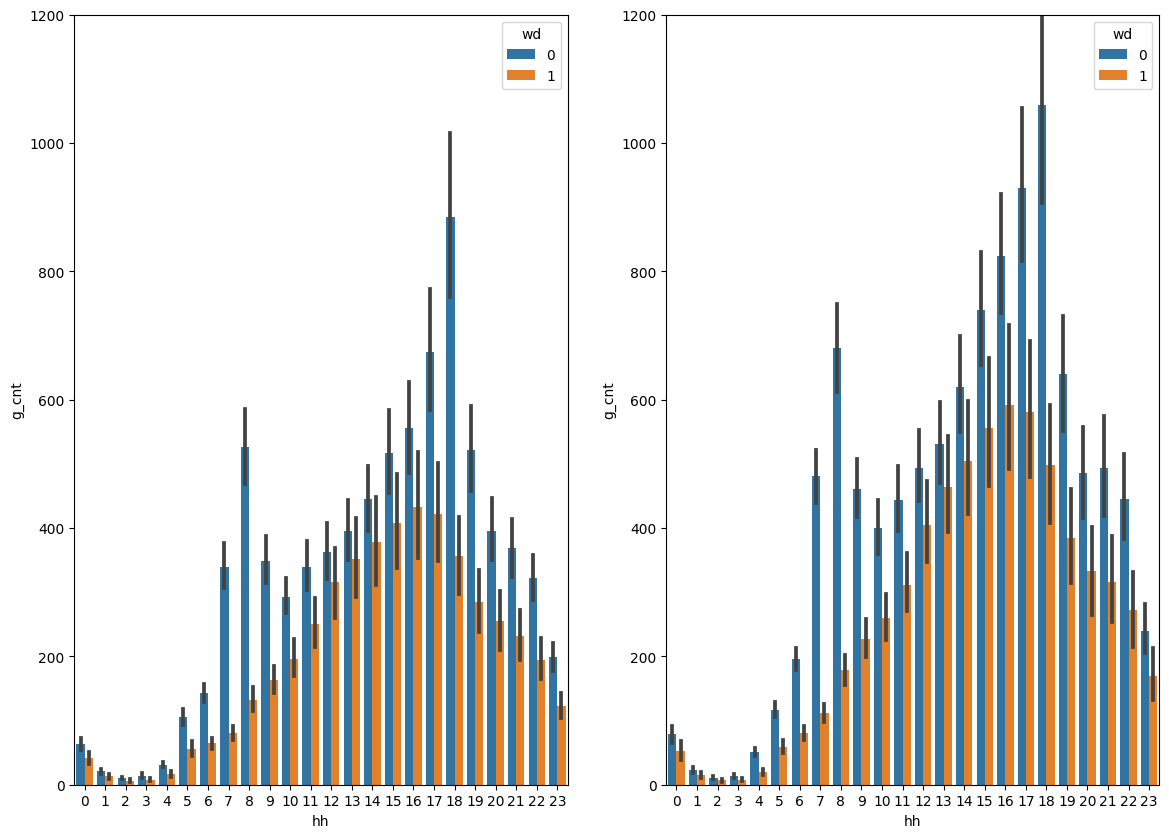

In [211]:
plt.figure(figsize=(14,10))

plt.subplot(1,2,1)
sns.barplot(data=bus_3month, x='hh', y='g_cnt', hue='wd')
plt.ylim([0, 1200])

plt.subplot(1,2,2)
sns.barplot(data=bus_jongro_3month, x='hh', y='g_cnt', hue='wd')
plt.ylim([0, 1200])


plt.show()

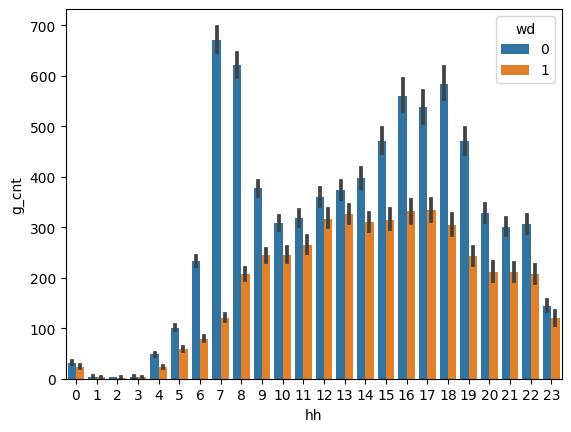

In [196]:
# plt.figure(figsize=(14,14))
sns.barplot(data=bus_nowon_3month, x='hh', y='g_cnt', hue='wd')
plt.show()

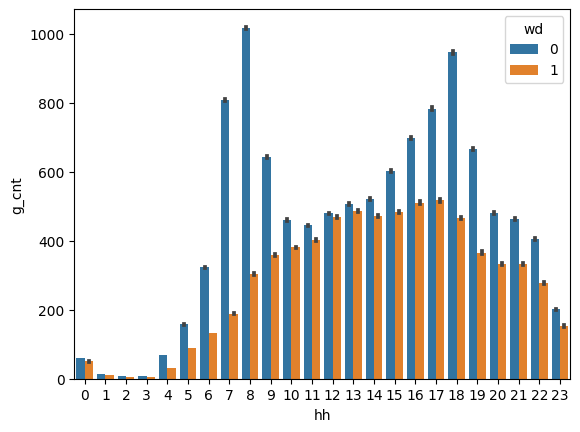

In [191]:
# plt.figure(figsize=(14,14))
sns.barplot(data=bus, x='hh', y='g_cnt', hue='wd')
plt.show()

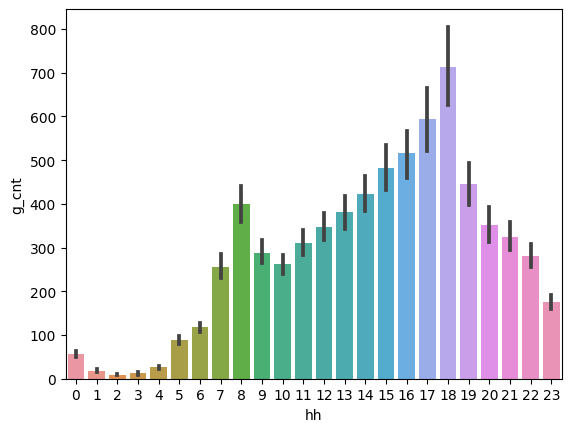

In [146]:
sns.barplot(data=bus_3month, x='hh', y='g_cnt')
plt.show()

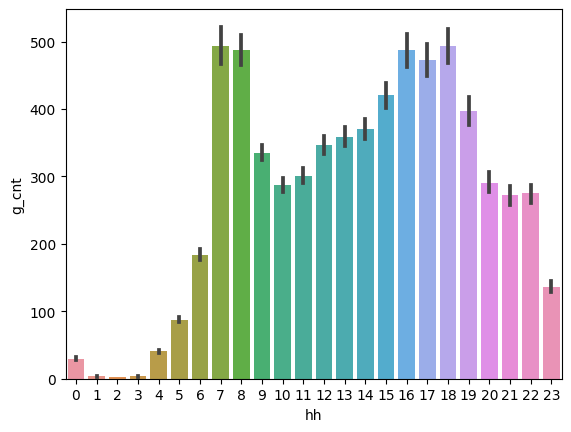

In [195]:
sns.barplot(data=bus_nowon_3month, x='hh', y='g_cnt')
plt.show()

In [132]:
# 서울geojson을 중구geojson으로 잘라서 저장

# state_geo = gpd.read_file('./datasets/seoul_geo_dong.geojson')
# junggu_geo = state_geo[ state_geo['adm_cd'].astype('int')//100 == 11020 ]

# with open('C:\\AI\\pythonProject\\venv\\lecture\\semipjt\\datasets\\junggu_geo.geojson', 'w') as f:
#     f.write(junggu_geo.to_json(drop_id=True))

In [129]:
# state_geo = gpd.read_file('./datasets/seoul_geo_dong.geojson')
# junggu_geo = state_geo[ state_geo['adm_cd'].astype('int')//100 == 11020 ]
# junggu_geo

# here = [37.560914, 126.990202]
# m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

# folium.GeoJson(junggu_geo).add_to(m)
# m

In [15]:
# state_geo = gpd.read_file('./datasets/seoul_geo_sigugun.json')
# seoul_ingu = pd.read_csv("./datasets/주민등록인구_20230222161234.csv", sep='\t', encoding='cp949')

# here = [37.560914, 126.990202]
# m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

# m.choropleth(
#     geo_data=state_geo,
#     data=seoul_ingu,
#     columns=['동별', '총계'],
#     key_on='feature.properties.name')
# m

In [16]:
junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
bus_3month_dong_tot = pd.read_csv('./datasets/bus_3month_dong_tot.csv')

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=junggu_geo,
    data=bus_3month_dong_tot,
    columns=['dong_id', 'guest_cnt'],
    key_on='feature.properties.adm_cd')
m

# 인구데이터 불러오기

# 중구 3월 주중

In [17]:
junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
junggu_3mm = pd.read_csv('./datasets/버스중구3월.csv')
junggu_3mm_dong_cnt_wd = junggu_3mm[junggu_3mm['wd']==0].groupby('dong_id')[['g_cnt']].mean().reset_index()

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=junggu_geo,
    data=junggu_3mm_dong_cnt_wd,
    columns=['dong_id', 'g_cnt'],
    key_on='feature.properties.adm_cd')
m

# 중구 3월 주말

In [12]:
junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
junggu_3mm = pd.read_csv('./datasets/버스중구3월.csv')
junggu_3mm_dong_cnt_we = junggu_3mm[junggu_3mm['wd']==1].groupby('dong_id')[['g_cnt']].mean().reset_index()

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=junggu_geo,
    data=junggu_3mm_dong_cnt_we,
    columns=['dong_id', 'g_cnt'],
    key_on='feature.properties.adm_cd')
m

In [100]:
# 인구당승객

junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
서울인구 = pd.read_csv('./datasets/gu_dong_population_2022_03.csv', encoding='cp949')
중구인구 = 서울인구[서울인구['구별']=='중구']
중구인구['코드'] = ['1102052','1102054','1102055','1102057','1102058','1102059','1102060','1102065','1102067','1102068','1102069','1102070','1102071','1102072','1102073']
중구인구['소계'] = 중구인구['소계'].str.replace(',', '').astype('int')
중구인구['코드'] = 중구인구['코드'].astype('int')
중구3월 = pd.read_csv('./datasets/버스중구3월.csv')
중구3월동별총합 = 중구3월.groupby('dong_id')[['g_cnt']].sum().reset_index()
중구3월동별총합['코드'] = 중구3월동별총합['dong_id']
중구인구_승객 = pd.merge(중구인구, 중구3월동별총합, how='inner', on='코드')
중구인구_승객['인구당승객'] = 중구인구_승객['g_cnt']/중구인구_승객['소계']
중구동별인구당승객 = 중구인구_승객[['dong_id','인구당승객']]

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=junggu_geo,
    data=중구동별인구당승객,
    columns=['dong_id', '인구당승객'],
    key_on='feature.properties.adm_cd')
m